In [1]:
from tkinter import *
from numpy import *
from tkinter import ttk
from tkinter import messagebox
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrale
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [2]:
class RectangleG(object): 
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x# contiens les xi
        y=f(x)#les yi 
        h = float(x[1] - x[0])
        s = sum(y[0:-1])
        return h * s
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , yl[i], yl[i]  , 0     , 0   ] # ordonnees des sommets
            plt.plot(x_rect, y_rect,"g")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)
        plt.plot(xl, yl,"rd")
        plt.ylabel('f(x)')
        plt.title ( ' Méthode des rectangles gauches')       

In [3]:
class Trapezoidal(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s / 2.0
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , yl[i], yl[i+1]  , 0     , 0   ] # ordonnees des sommets
            plt.plot(x_rect, y_rect,"m")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)#plot de f(x)
        plt.plot(xl, yl,"cs")#point support
        plt.ylabel('f(x)')
        plt.title ( ' Méthode des Trapèzes' )

In [4]:
class Simpson(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate ( self , f ) :
        x= self.x
        y= f(x)
        h = float(x[2] - x[1])
        n = len(x) - 1
        if n % 2 == 1:
            n=n-1
        s = y[0] + y[n] + 4.0 * sum(y[1:-1:2]) + 2.0 * sum(y[2:-2:2])
        return h * s / 3.0
    def Graph(self , f , resolution =1001):
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            xx = np.linspace(xl[ i ],xl[i + 1],resolution)
            m = (xl[i]+ xl[i + 1])/ 2
            a = xl[i]
            b = xl[i +1]
            l0  =(xx-m)/(a-m)*(xx-b)/(a-b)
            l1 =(xx-a)/(m-a)*(xx-b)/(m-b)
            l2 =(xx-a)/(b-a)*(xx-m)/(b-m)
            P = f(a)*l0 + f(m)*l1 + f(b)*l2
        plt.plot( xx , P , "r")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine,"g")#plot de f(x)
        plt.plot(xl, yl,'bo')#point support
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Simpson' )

In [5]:
class PointMilieu(object):
    def __init__(self, a, b, n, f):#initialiser les paramètres du classe
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x# contiens les xi
        h = float(x[1] - x[0])
        s=0
        for i in range(self.n):
            s=s+f((x[i]+x[i+1])*0.5)
        return h*s
       
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl=f(xl);
        xlist_fine=np.linspace(self.a, self.b, resolution)
        
        for i in range(self.n):
            
            m=(xl[i]+xl[i+1])/2
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , f(m), f(m)  , 0     , 0   ] # ordonnees des sommets
            plt.plot(x_rect, y_rect,"b")
            yflist_fine = f(xlist_fine)
            plt.plot(xlist_fine, yflist_fine)
            plt.plot(m,f(m),"y*")
            plt.xlabel('x')
            plt.ylabel('f(x)')
            plt.title ( ' Méthode des milieu' )

<Figure size 432x288 with 0 Axes>

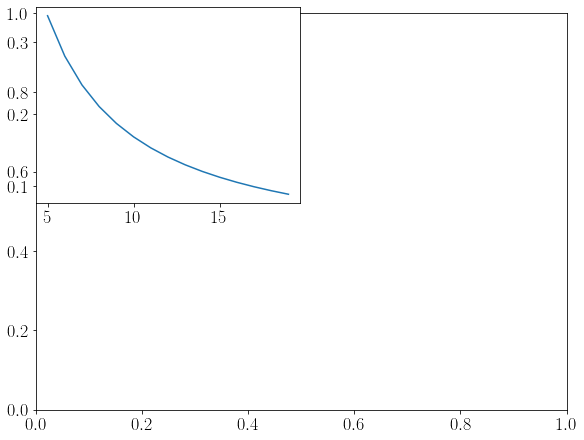

In [33]:
class mclass:

    def __init__(self, window):
        self.window = window

        varTitle = StringVar()
        varTitle.set("Interpolation polynominale")
        labelTitle = Label(window, textvariable=varTitle, fg="#2F4F4F", height=2)
        labelTitle.grid(row=0, columnspan=3, sticky=S, padx=10)

        var1 = StringVar()
        var1.set("L’intégration est un des problèmes les plus importants que lonrencontre en analyse.")
        label1 = Label(window, textvariable=var1, height=1)
        label1.grid(row=1, columnspan=3, sticky=W, padx=20)

        var2 = StringVar()
        var2.set("Calculer sur [a, b] l'integrale  de la fonction f(x),") 
        label2 = Label(window, textvariable=var2, height=1)
        label2.grid(row=2, columnspan=3, sticky=W, padx=20)

    
        varM= StringVar() 
        varM.set("Methode :")
        labelM = Label(window, textvariable=varM, height=2)
        labelM.grid(row=3, sticky=W, pady=10, padx=20)
        
        self.monthchoosen= ttk.Combobox(window) 
        self.monthchoosen['values'] = ('RectangleG','Trapezoidal','Simpson','PointMilieu') 
        self.monthchoosen.grid(row=3,column=2, pady=10, padx=10)
        
        varF = StringVar()

        varF.set("La fonction, f(x) :")
        labelF = Label(window, textvariable=varF, height=2)
        labelF.grid(row=4, sticky=W, pady=10, padx=20)

        idF = StringVar()
        self.boxF = Entry(window, bd=4, width=40, textvariable=idF)
        self.boxF.grid(row=4, column=2, pady=10, padx=10)
        
        varA = StringVar()
        varA.set("La borne inférieur, a :")
        labelA = Label(window, textvariable=varA, height=2)
        labelA.grid(row=5, sticky=W, pady=10, padx=20)

        idA = StringVar()
        self.boxA = Entry(window, bd=4, width=40, textvariable=idA)
        self.boxA.grid(row=5, column=2, pady=10, padx=10)

        varB = StringVar()
        varB.set("La borne supérieur, b :")
        labelB = Label(window, textvariable=varB, height=2)
        labelB.grid(row=6, sticky=W, pady=10, padx=20)

        idB = StringVar()
        self.boxB = Entry(window, bd=4, width=40, textvariable=idB)
        self.boxB.grid(row=6, column=2, pady=10, padx=10)

        varN = StringVar()
        varN.set("N:")
        labelN = Label(window, textvariable=varN, height=2)
        labelN.grid(row=7, sticky=W, pady=10, padx=20)

        idN = StringVar()
        self.boxN = Entry(window, bd=4, width=40, textvariable=idN)
        self.boxN.grid(row=7, column=2, pady=10, padx=10)

        self.button1 = Button(window, text="  PLOT  ", bg="#2F4F4F", fg="white",width=20, command=self.plot)
        self.button1.grid(row=8, column=2, sticky=E, pady=20, padx=20)
        self.button2 = Button(window, text=" Avec tous méthodes  ", bg="#2F4F4F", fg="white",width=20,command=self.plotAll)
        self.button2.grid(row=8, column=2, sticky=W, pady=10, padx=20)
        var3 = StringVar()
        var3.set("Pour contraire un courbe de changement d'erreur pour chaque méthode par rapport au N") 
        label3 = Label(window, textvariable=var3, height=1)
        label3.grid(row=9, columnspan=3, sticky=W, padx=20)
        
        varN_M = StringVar()
        varN_M.set(" Donner N_Max:")
        labelN_M = Label(window, textvariable=varN_M, height=2)
        labelN_M.grid(row=10, sticky=W, pady=10, padx=20)

        idN_M = StringVar()
        self.boxN_M = Entry(window, bd=4, width=40, textvariable=idN_M)
        self.boxN_M.grid(row=10, column=2, pady=10, padx=10)
        
        self.button3 = Button(window, text="  Afficher  ", bg="#2F4F4F", fg="white",width=20,command=self.Afficher)
        self.button3.grid(row=11, column=2, sticky=E, pady=20, padx=20)
    def plot(self):
            N = int(self.boxN.get())
            a = float(self.boxA.get())
            b = float(self.boxB.get())
            F = self.boxF.get()
            M = self.monthchoosen.get()
            f = lambda x:eval(F)
            plt.clf()
            self.fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))
            result,e=integrale.quad(f,a,b)
            if M == 'RectangleG':
                R= RectangleG(a,b,N,f)
                R.Graph(f)  
                i=R.integrate( f )
            if M == 'Simpson':
                S= Simpson(a,b,N,f)
                S.Graph(f)
                i=S.integrate( f )
            if M == 'Trapezoidal':
                T= Trapezoidal(a,b,N,f)
                T.Graph(f)
                i=T.integrate(f)
            if M == 'PointMilieu':
                P= PointMilieu(a,b,N,f)
                P.Graph(f) 
                i=P.integrate( f )
            text_i='$I_{'+str(N)+'}$ ='+str(i)
            erreur=result-i
            text_e='Erreur='+str(erreur)
            textstr = '\n'.join((text_i,text_e))
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
            self.canvas = FigureCanvasTkAgg(self.fig, master=self.window)
            self.canvas.get_tk_widget().grid(row=3, column=3, rowspan=6, pady=10, padx=10)

    def plotAll(self):
            N = int(self.boxN.get())
            a = float(self.boxA.get())
            b = float(self.boxB.get())
            F = self.boxF.get()
            f = lambda x:eval(F)
            self.fig, ax = plt.subplots(constrained_layout=True, figsize=(9,9))
            plt.clf()
            result,e=integrale.quad(f,a,b)
            self.fig.add_subplot(221)
            R= RectangleG(a,b,N,f)
            R.Graph(f)  
            self.fig.add_subplot(222)
            S= Simpson(a,b,N,f)
            S.Graph(f)
            self.fig.add_subplot(223)
            T= Trapezoidal(a,b,N,f)
            T.Graph(f)
            self.fig.add_subplot(224)
            P= PointMilieu(a,b,N,f)
            P.Graph(f) 
            plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
            self.canvas = FigureCanvasTkAgg(self.fig, master=self.window)
            self.canvas.get_tk_widget().grid(row=3, column=3, rowspan=6, pady=10, padx=10)
    def Afficher(self):
            N = int(self.boxN.get())
            a = float(self.boxA.get())
            b = float(self.boxB.get())
            F = self.boxF.get()
            n=int(self.boxN_M.get())
            f = lambda x:eval(F)
            r=[]
            s=[]
            p=[]
            t=[]
            plt.clf()
            self.fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 6))
            result,e=integrale.quad(f,a,b)
            for i in range(N,n):
                R= RectangleG(a,b,i,f)
                j=result-R.integrate( f )
                r.append(j)
                S= Simpson(a,b,i,f)
                s.append(result-S.integrate( f ))
                T= Trapezoidal(a,b,i,f)
                t.append(result-T.integrate(f))
                P= PointMilieu(a,b,i,f)
                p.append(result-P.integrate( f ))
            var=[i for i in range(N,n)]
            self.fig.add_subplot(221)
            plt.plot(var,r)
            self.fig.add_subplot(222)
            plt.plot(var,s)
            self.fig.add_subplot(223)
            plt.plot(var,t)
            self.fig.add_subplot(224)
            plt.plot(var,p)
            #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
            self.canvas = FigureCanvasTkAgg(self.fig, master=self.window)
            self.canvas.get_tk_widget().grid(row=3, column=3, rowspan=6, pady=10, padx=10)
if __name__ == '__main__':
    window = Tk()
    window.title('Interpolation Polynominale')
    window.resizable(width=True, height=True)
    window.geometry('+0+0')
    start = mclass(window)
    window.mainloop()


In [ ]:
 plt.plot(var,r,'r',label='Erreur de la methode RectangleG')
            plt.plot(var, s, 'b', color="black", linestyle="None",label="Erreur de la methode Simpson")
            ax = plt.gca()
            ax.grid(True)
            plt.rc('text', usetex=True)
            plt.rcParams['xtick.labelsize'] = 18
            plt.rcParams['ytick.labelsize'] = 18
            plt.title("$Erreur de l'integrale$", fontsize=18)  
            plt.plot(var,t,'y',label="Erreur de la methode Trapeze")
            plt.plot(var,p,'g', label="Erreur de la methode point milieu")
            plt.legend(loc=0, prop={'size': 18})
            plt.show()
            self.canvas = FigureCanvasTkAgg(self.fig, master=self.window)
            self.canvas.get_tk_widget().grid(row=3, column=3, rowspan=6, pady=10, padx=10)